In [1]:
import numpy as np
import pandas as pd

In [2]:
train_in = pd.read_csv("../../data/train_in.csv", header=None)
test_in = pd.read_csv("../../data/test_in.csv", header=None)
train_out = pd.read_csv("../../data/train_out.csv", header=None)
test_out = pd.read_csv("../../data/test_out.csv", header=None)

In [3]:
X_train = train_in.to_numpy(dtype=np.float32)
X_test = test_in.to_numpy(dtype=np.float32)
y_train = train_out.to_numpy(dtype=np.int64).ravel()
y_test = test_out.to_numpy(dtype=np.int64).ravel()

In [4]:
def add_bias(X: np.ndarray) -> np.ndarray:
    ones = np.ones((X.shape[0], 1), dtype=X.dtype)
    return np.hstack([X, ones])

In [5]:
X_train = add_bias(X_train)  # (N_train, 257)
X_test  = add_bias(X_test)
num_classes = 10
num_features = X_train.shape[1]
rng = np.random.default_rng(2)

In [6]:
def evaluate(X: np.ndarray, y: np.ndarray, W: np.ndarray):
    no_of_examples = X.shape[0]
    scores = X @ W
    predictions = np.argmax(scores, axis=1)

    accuracy = (predictions == y).mean()
    epoch_loss = 1.0 - accuracy
    Y_true = one_hot(y, num_classes)
    Y_pred = one_hot(predictions, num_classes)
    mistakes = (predictions != y).astype(np.float32)[:, None]
    epoch_gradient = (Y_pred - Y_true) * mistakes / no_of_examples

    return accuracy, epoch_loss, epoch_gradient

In [7]:
def one_hot(y: np.ndarray, no_of_classes: int) -> np.ndarray:
    one_hot_encoding = np.zeros((y.shape[0], no_of_classes), dtype=np.float64)
    one_hot_encoding[np.arange(y.shape[0]), y] = 1.0
    return one_hot_encoding

In [8]:
def softmax(X, axis=1):
    X = X - np.max(X, axis=axis, keepdims=True)  # stabilize per row
    e_X = np.exp(X)
    return e_X / np.sum(e_X, axis=axis, keepdims=True)

In [9]:
epochs = 100
lr = 0.01

W = rng.normal(0, 0.01, size=(num_features, num_classes))
train_acc_hist, train_loss_hist = [], []
test_acc_hist, test_loss_hist = [], []

for epoch in range(1, epochs + 1):
    X = X_train
    y = y_train

    train_acc, train_loss, epoch_gradient = evaluate(X, y, W)
    W -= lr * (X.T @ epoch_gradient)

    test_acc, test_loss, _ = evaluate(X_test, y_test, W)

    train_acc_hist.append(train_acc)
    train_loss_hist.append(train_loss)

    test_acc_hist.append(test_acc)
    test_loss_hist.append(test_loss)

    print(
        f"Epoch {epoch:03d} | "
        f"train acc: {train_acc:.4f} | train loss: {train_loss:.4f} | "
        f"test acc: {test_acc:.4f} | test loss: {test_loss:.4f}"
    )
    # break

    if train_acc == 1:
        break

Epoch 001 | train acc: 0.0504 | train loss: 0.9496 | test acc: 0.3030 | test loss: 0.6970
Epoch 002 | train acc: 0.3070 | train loss: 0.6930 | test acc: 0.2500 | test loss: 0.7500
Epoch 003 | train acc: 0.2244 | train loss: 0.7756 | test acc: 0.4000 | test loss: 0.6000
Epoch 004 | train acc: 0.4007 | train loss: 0.5993 | test acc: 0.4160 | test loss: 0.5840
Epoch 005 | train acc: 0.4423 | train loss: 0.5577 | test acc: 0.5010 | test loss: 0.4990
Epoch 006 | train acc: 0.5425 | train loss: 0.4575 | test acc: 0.5210 | test loss: 0.4790
Epoch 007 | train acc: 0.5624 | train loss: 0.4376 | test acc: 0.5510 | test loss: 0.4490
Epoch 008 | train acc: 0.6327 | train loss: 0.3673 | test acc: 0.5490 | test loss: 0.4510
Epoch 009 | train acc: 0.6298 | train loss: 0.3702 | test acc: 0.5920 | test loss: 0.4080
Epoch 010 | train acc: 0.6737 | train loss: 0.3263 | test acc: 0.6080 | test loss: 0.3920
Epoch 011 | train acc: 0.6883 | train loss: 0.3117 | test acc: 0.6290 | test loss: 0.3710
Epoch 012 

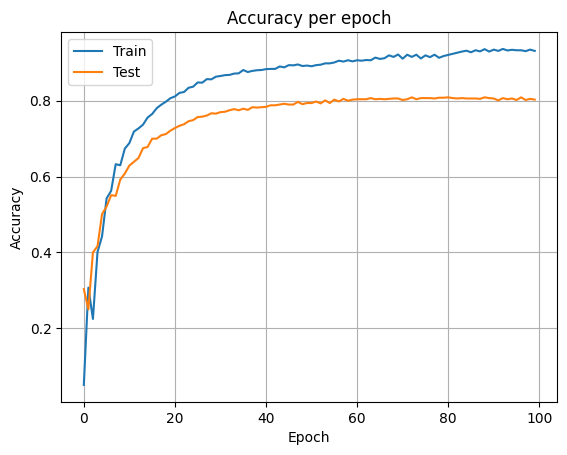

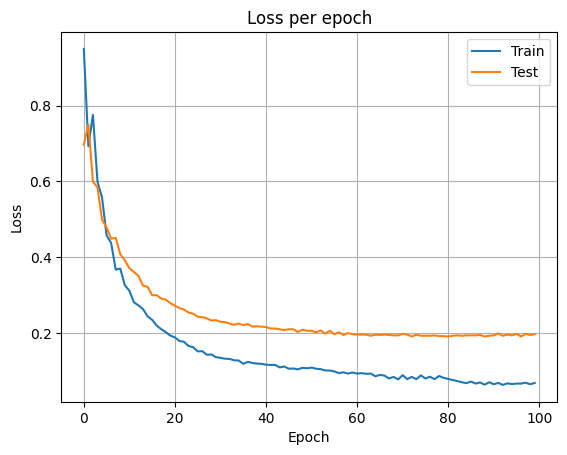

In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(train_acc_hist)), train_acc_hist, label="Train", color="tab:blue")
plt.plot(range(len(test_acc_hist)), test_acc_hist,  label="Test",  color="tab:orange")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per epoch")
plt.grid(True); plt.legend()

plt.figure()
plt.plot(range(len(train_loss_hist)), train_loss_hist, label="Train", color="tab:blue")
plt.plot(range(len(test_loss_hist)), test_loss_hist,  label="Test",  color="tab:orange")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.grid(True); plt.legend()

plt.show()